In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Hp\Downloads\Mall_Customers.csv")

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [3]:
df = df.drop(df.columns[[0, 1,2]], axis=1)

In [5]:
df.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

In [8]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,10):
    k_means=KMeans(n_clusters=i,init="k-means++")
    k_means.fit(scaled_data)
    wcss.append(k_means.inertia_)

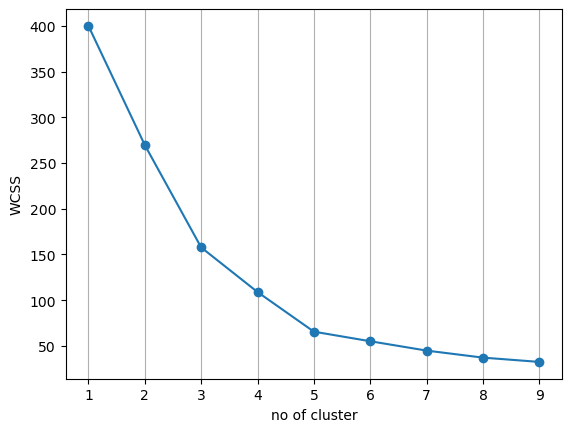

In [9]:
plt.plot([i for i in range(1,10)],wcss,marker="o")
plt.xlabel("no of cluster")
plt.ylabel("WCSS")
plt.xticks([i for i in range(1,10)])
plt.grid(axis="x")
plt.show()

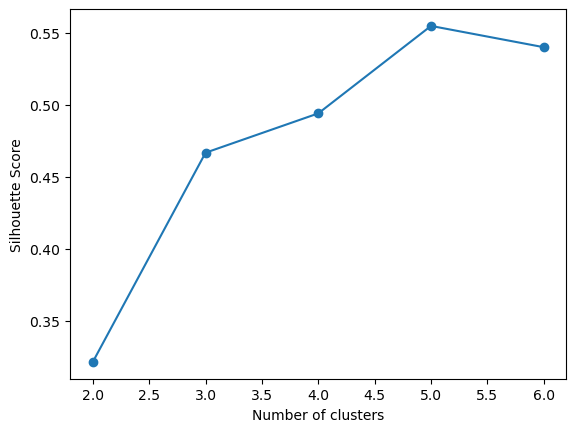

In [12]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for i in range(2, 7):
    k_means = KMeans(n_clusters=i, init="k-means++", random_state=42)
    y_kmeans = k_means.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, y_kmeans))

plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
k_means = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = k_means.fit_predict(scaled_data)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_scr1 = silhouette_score(scaled_data, k_means.labels_)
silhouette_scr1

0.5546571631111091

In [ ]:
['Annual Income (k$)', 'Spending Score (1-100)']

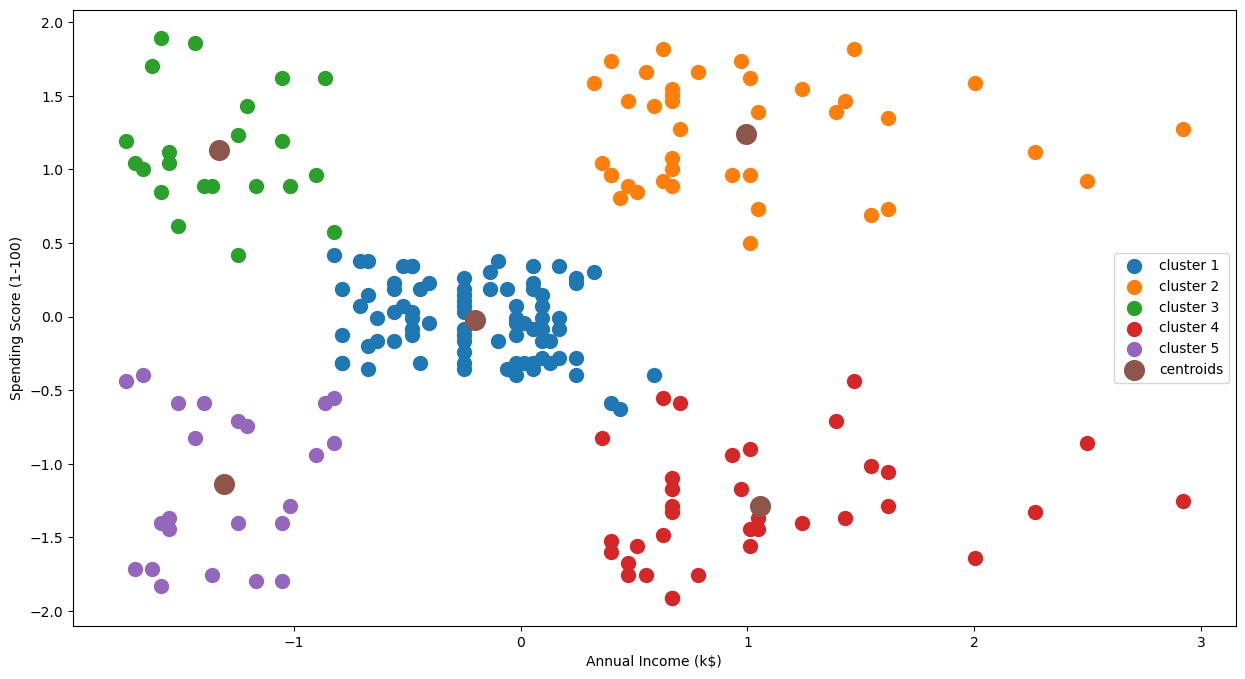

In [18]:
plt.figure(figsize=(15,8))
plt.scatter(scaled_data[y_kmeans ==0,0],scaled_data[y_kmeans==0,1],s=100,label="cluster 1")
plt.scatter(scaled_data[y_kmeans ==1,0],scaled_data[y_kmeans==1,1],s=100,label="cluster 2")
plt.scatter(scaled_data[y_kmeans ==2,0],scaled_data[y_kmeans==2,1],s=100,label="cluster 3")
plt.scatter(scaled_data[y_kmeans ==3,0],scaled_data[y_kmeans==3,1],s=100,label="cluster 4")
plt.scatter(scaled_data[y_kmeans ==4,0],scaled_data[y_kmeans==4,1],s=100,label="cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=200,label="centroids")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
agglo=AgglomerativeClustering(n_clusters=2,linkage="ward",metric="euclidean")
agglo.fit_predict(scaled_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [21]:
from sklearn.metrics import silhouette_score
silhouette_scr2 = silhouette_score(scaled_data, agglo.labels_)
silhouette_scr2

0.3842337621772661

In [22]:
agglo=AgglomerativeClustering(n_clusters=5,linkage="ward",metric="euclidean")
agglo.fit_predict(scaled_data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [23]:
silhouette_scr3 = silhouette_score(scaled_data, agglo.labels_)
silhouette_scr3

0.5538089226688662

In [26]:
agglo=AgglomerativeClustering(n_clusters=5,linkage="complete",metric="manhattan")
agglo.fit_predict(scaled_data)

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [27]:
silhouette_scr4 = silhouette_score(scaled_data, agglo.labels_)
silhouette_scr4

0.5391762674745034

In [28]:
agglo=AgglomerativeClustering(n_clusters=5,linkage="complete",metric="euclidean")
agglo.fit_predict(scaled_data)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [29]:
silhouette_scr5 = silhouette_score(scaled_data, agglo.labels_)
silhouette_scr5

0.5531118656926701